In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_raw = pd.read_csv(
    '../Data/housing_data.csv',
    parse_dates = ['period_begin', 'period_end'],
    dtype = {'total_homes_sold' : 'Int32', 'region_name' : 'category'} 
) #category cuts down on processing time

In [3]:
ca_housing = housing_raw.loc[
    (housing_raw['region_name'].str.contains('CA'))
].assign(region_name = housing_raw['region_name'].str[0:-11])

In [4]:
ca_housing.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.9 MB


In [7]:
ca_housing_pivot = ca_housing.pivot_table(index='period_begin',
                                         columns = 'region_name',
                                         values = 'inventory').assign(
    CA_average = lambda x: x.mean(axis = 1))

In [18]:
inventory = ca_housing_pivot.loc[:, ['San Diego',
                                     'Los Angeles',
                                    'San Francisco']]

inventory.head()

region_name,San Diego,Los Angeles,San Francisco
period_begin,,,
2017-01-02,5468.0,15492.0,626.0
2017-01-09,5493.0,15605.0,652.0
2017-01-16,5520.0,15724.0,673.0
2017-01-23,5546.0,15834.0,685.0
2017-01-30,5581.0,15972.0,697.0


''

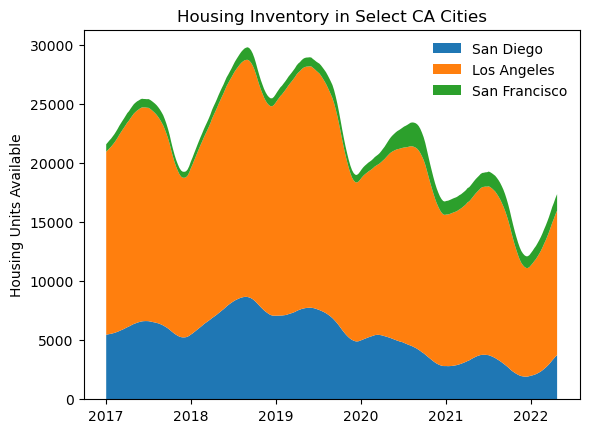

In [19]:
fig, ax = plt.subplots()

ax.stackplot(
    inventory.index,
    inventory["San Diego"],
    inventory['Los Angeles'],
    inventory['San Francisco'])
ax.set_title("Housing Inventory in Select CA Cities")
ax.set_ylabel("Housing Units Available")
ax.legend(inventory.columns, frameon = False)
;

In [20]:
ca_housing_pivot = ca_housing.pivot_table(index='period_begin',
                                         columns = 'region_name',
                                         values = 'median_active_list_price').assign(
    CA_average = lambda x: x.mean(axis = 1))

ca_median_price = ca_housing_pivot.loc[:, ['San Diego',
                                     'Los Angeles',
                                    'San Francisco']]

''

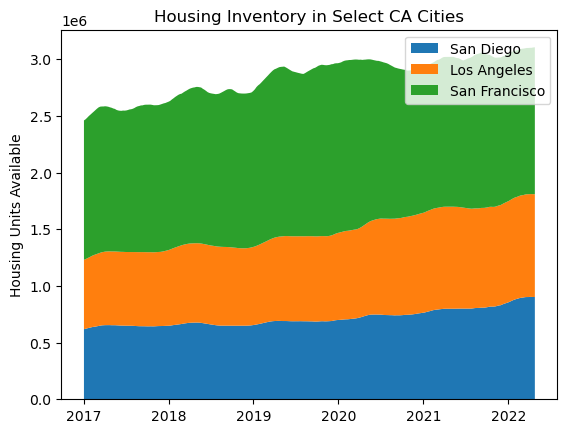

In [22]:
#graph doesn't make sense - just for illustration
fig, ax = plt.subplots()

ax.stackplot(
    ca_median_price.index,
    ca_median_price["San Diego"],
    ca_median_price['Los Angeles'],
    ca_median_price['San Francisco'])
ax.set_title("Housing Inventory in Select CA Cities")
ax.set_ylabel("Housing Units Available")
ax.legend(inventory.columns)
;

In [33]:
ca_housing = (housing_raw
.loc[(housing_raw['region_name'].str.contains('CA'))]
.assign(region_name = housing_raw['region_name'].str[0:-11])
.set_index('period_begin').sort_index()
)

In [34]:
ca_housing.head()

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2,5.0,5.0,98.8,198750.0,5.500000


In [35]:
sd_dual = (ca_housing
          .loc[ca_housing['region_name'] == "San Diego",
              ["inventory", 'median_active_list_price']]
          )
sd_dual.head()

,inventory,median_active_list_price
period_begin,,
2017-01-02,5468.0,618570.8
2017-01-09,5493.0,621737.5
2017-01-16,5520.0,625820.8
2017-01-23,5546.0,629491.6
2017-01-30,5581.0,632824.0


''

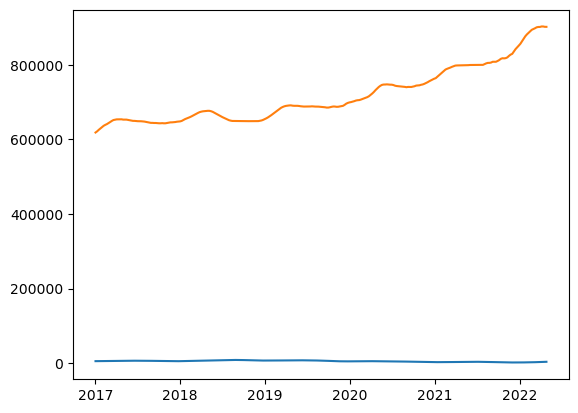

In [36]:
fig, ax = plt.subplots()

ax.plot(sd_dual['inventory'])
ax.plot(sd_dual['median_active_list_price'])


;

''

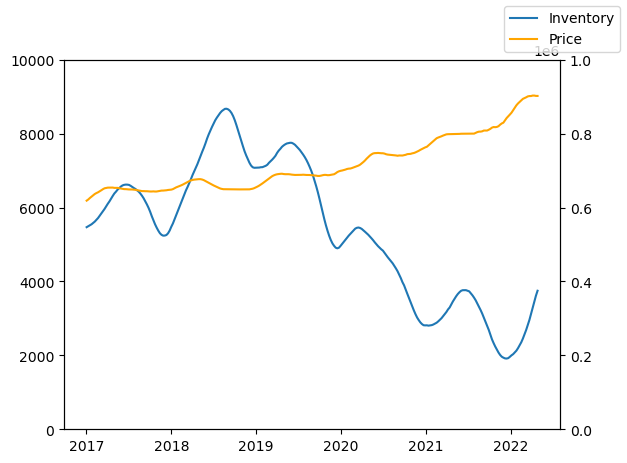

In [42]:
fig, ax = plt.subplots()

ax.plot(sd_dual['inventory'], label = "Inventory")

ax.set_ylim(0, 10000)

ax2 = ax.twinx()

ax2.plot(sd_dual['median_active_list_price'], label = "Price", c = "orange")
ax2.set_ylim(0, 1000000)

fig.legend()
;